### Análise Exploratória

In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

nltk.download('stopwords')
nltk.download('punkt')

df = pd.read_csv('./datasets/Mental-Health-Twitter.csv')

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df['post_text'] = df['post_text'].apply(remove_urls)

# Remove as palavras 'RT', 'Rt', e 'rt' (retweets)
df['post_text'] = df['post_text'].str.replace(r'\b(RT|Rt|rt)\b', '', regex=True)

df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\felip\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\felip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Unnamed: 0             post_id                    post_created  \
0               0  637894677824413696  Sun Aug 30 07:48:37 +0000 2015   
1               1  637890384576778240  Sun Aug 30 07:31:33 +0000 2015   
2               2  637749345908051968  Sat Aug 29 22:11:07 +0000 2015   
3               3  637696421077123073  Sat Aug 29 18:40:49 +0000 2015   
4               4  637696327485366272  Sat Aug 29 18:40:26 +0000 2015   
...           ...                 ...                             ...   
19995       19995  819336825231773698  Thu Jan 12 00:14:56 +0000 2017   
19996       19996  819334654260080640  Thu Jan 12 00:06:18 +0000 2017   
19997       19997  819334503042871297  Thu Jan 12 00:05:42 +0000 2017   
19998       19998  819334419374899200  Thu Jan 12 00:05:22 +0000 2017   
19999       19999  819334270825197568  Thu Jan 12 00:04:47 +0000 2017   

                                               post_text     user_id  \
0      It's just over 2 years since I was diagnosed w...  1013187241   
1      It's Sunday, I need a break, so I'm planning t...  1013187241   
2      Awake but tired. I need to sleep but my brain ...  1013187241   
3       @SewHQ: #Retro bears make perfect gifts and a...  1013187241   
4      It’s hard to say whether packing lists are mak...  1013187241   
...                                                  ...         ...   
19995              A day without sunshine is like night.  1169875706   
19996  Boren's Laws: (1) When in charge, ponder. (2) ...  1169875706   
19997  The flow chart is a most thoroughly oversold p...  1169875706   
19998  Ships are safe in harbor, but they were never ...  1169875706   
19999     Black holes are where God is dividing by zero.  1169875706   

       followers  friends  favourites  statuses  retweets  label  
0             84      211         251       837         0      1  
1             84      211         251       837         1      1  
2             84      211         251       837         0      1  
3             84      211         251       837         2      1  
4             84      211         251       837         1      1  
...          ...      ...         ...       ...       ...    ...  
19995        442      230           7   1063601         0      0  
19996        442      230           7   1063601         0      0  
19997        442      230           7   1063601         0      0  
19998        442      230           7   1063601         0      0  
19999        442      230           7   1063601         0      0  

[20000 rows x 11 columns]

72.0623


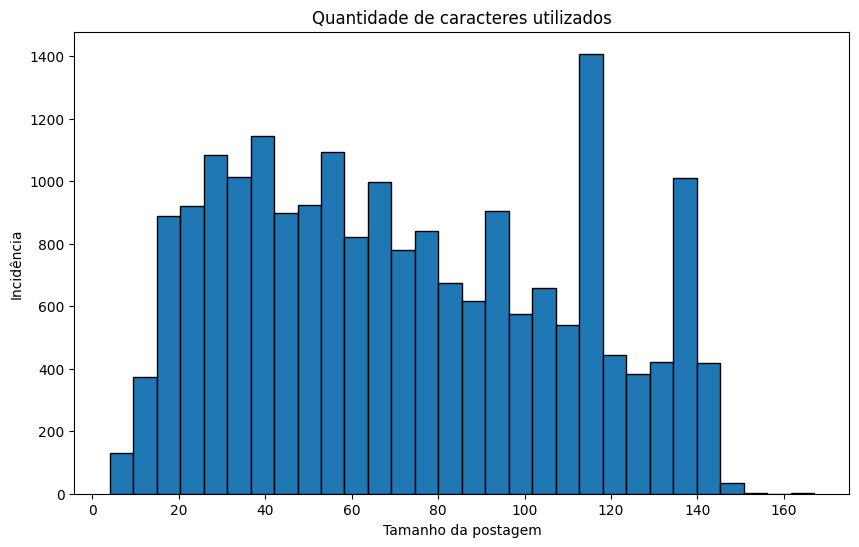

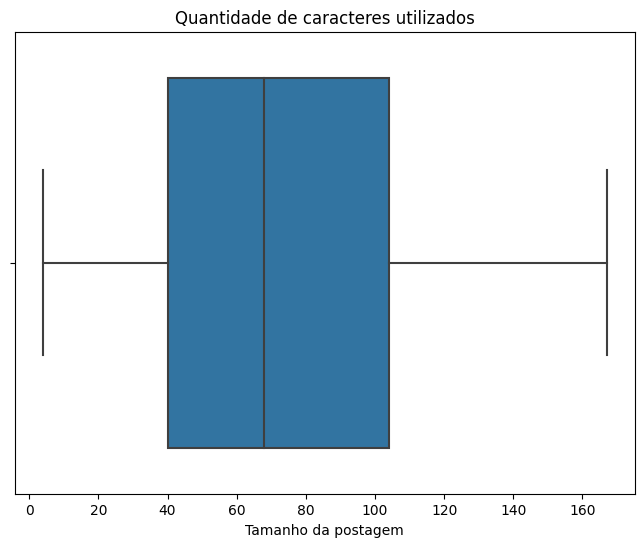

In [3]:
df['text_size'] = df['post_text'].apply(len)

print(df['text_size'].mean())

plt.figure(figsize=(10, 6))
plt.hist(df['text_size'], bins=30, edgecolor='black')
plt.title('Quantidade de caracteres utilizados')
plt.xlabel('Tamanho da postagem')
plt.ylabel('Incidência')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['text_size'])
plt.title('Quantidade de caracteres utilizados')
plt.xlabel('Tamanho da postagem')
plt.show()

In [4]:
# Removendo stopwords, pontuação e lematizando
stop_words = set(stopwords.words('english') + list(string.punctuation))

lemmatizer = WordNetLemmatizer()

for index, row in df.iterrows():
    text = row['post_text']
    tokens = word_tokenize(text)
    # tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalnum() and word.lower() not in stop_words]
    df.at[index, 'text_lemmatized'] = ' '.join(tokens)

df_depress = df[df['label'] == 1]
df_non_depress = df[df['label'] == 0]

df

Unnamed: 0             post_id                    post_created  \
0               0  637894677824413696  Sun Aug 30 07:48:37 +0000 2015   
1               1  637890384576778240  Sun Aug 30 07:31:33 +0000 2015   
2               2  637749345908051968  Sat Aug 29 22:11:07 +0000 2015   
3               3  637696421077123073  Sat Aug 29 18:40:49 +0000 2015   
4               4  637696327485366272  Sat Aug 29 18:40:26 +0000 2015   
...           ...                 ...                             ...   
19995       19995  819336825231773698  Thu Jan 12 00:14:56 +0000 2017   
19996       19996  819334654260080640  Thu Jan 12 00:06:18 +0000 2017   
19997       19997  819334503042871297  Thu Jan 12 00:05:42 +0000 2017   
19998       19998  819334419374899200  Thu Jan 12 00:05:22 +0000 2017   
19999       19999  819334270825197568  Thu Jan 12 00:04:47 +0000 2017   

                                               post_text     user_id  \
0      It's just over 2 years since I was diagnosed w...  1013187241   
1      It's Sunday, I need a break, so I'm planning t...  1013187241   
2      Awake but tired. I need to sleep but my brain ...  1013187241   
3       @SewHQ: #Retro bears make perfect gifts and a...  1013187241   
4      It’s hard to say whether packing lists are mak...  1013187241   
...                                                  ...         ...   
19995              A day without sunshine is like night.  1169875706   
19996  Boren's Laws: (1) When in charge, ponder. (2) ...  1169875706   
19997  The flow chart is a most thoroughly oversold p...  1169875706   
19998  Ships are safe in harbor, but they were never ...  1169875706   
19999     Black holes are where God is dividing by zero.  1169875706   

       followers  friends  favourites  statuses  retweets  label  text_size  \
0             84      211         251       837         0      1        140   
1             84      211         251       837         1      1         95   
2             84      211         251       837         0      1         64   
3             84      211         251       837         2      1        125   
4             84      211         251       837         1      1        133   
...          ...      ...         ...       ...       ...    ...        ...   
19995        442      230           7   1063601         0      0         37   
19996        442      230           7   1063601         0      0         99   
19997        442      230           7   1063601         0      0        124   
19998        442      230           7   1063601         0      0         66   
19999        442      230           7   1063601         0      0         46   

                                         text_lemmatized  
0      2 year since diagnosed anxiety depression toda...  
1      sunday need break planning spend little time p...  
2                      awake tired need sleep brain idea  
3      sewhq retro bear make perfect gift great begin...  
4      hard say whether packing list making life easi...  
...                                                  ...  
19995                    day without sunshine like night  
19996  boren law 1 charge ponder 2 trouble delegate 3...  
19997  flow chart thoroughly oversold piece program d...  
19998                  ship safe harbor never meant stay  
19999                       black hole god dividing zero  

[20000 rows x 13 columns]

['2', 'year', 'since', 'diagnosed', 'anxiety', 'depression', 'today', 'taking', 'moment', 'reflect', 'far', 'come', 'since', 'sunday', 'need', 'break', 'planning', 'spend', 'little', 'time', 'possible', 'a14', 'awake', 'tired', 'need', 'sleep', 'brain', 'idea', 'sewhq', 'retro', 'bear', 'make', 'perfect', 'gift', 'great', 'beginner', 'get', 'stitching', 'october', 'sew', 'sale', 'yay', 'hard', 'say', 'whether', 'packing', 'list', 'making', 'life', 'easier', 'reinforcing', 'much', 'still', 'need', 'movinghouse', 'anxiety', 'making', 'packing', 'list', 'new', 'hobby', 'movinghouse', 'point', 'keeping', 'stuff', 'nostalgic', 'reason', 'cross', 'line', 'plain', 'old', 'hoarding', 'movinghouse', 'currently', 'packing', 'phase', 'think', 'closet', 'hoarder', 'ca', 'bothered', 'cook', 'take', 'away', 'way', 'lazy', 'itventsnews', 'itv', 'release', 'promo', 'video', 'final', 'series', 'downton', 'abbey', 'also', 'much', 'stuff', 'way', 'way', 'much', 'movinghouse', 'never', 'want', 'put', 'one

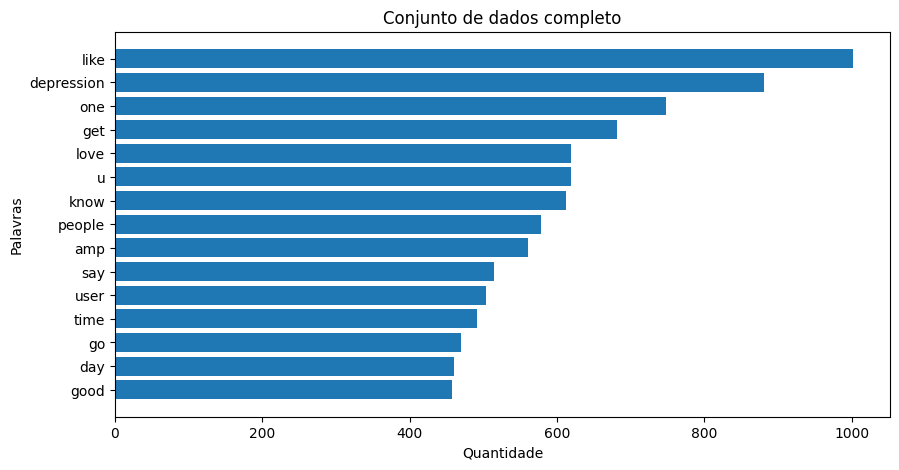

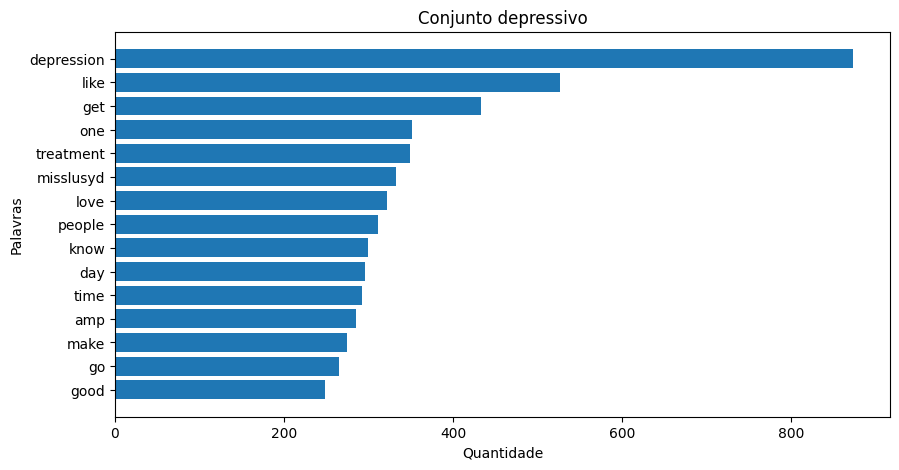

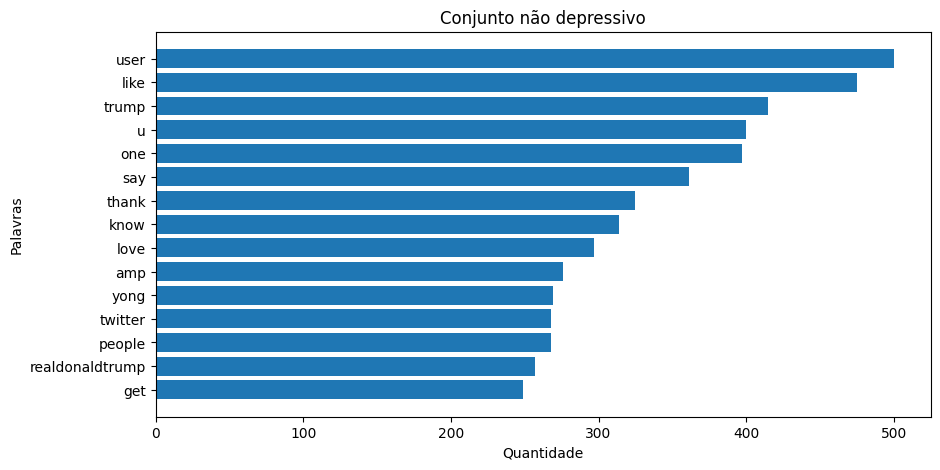

In [7]:
# Rankeando as palavras mais usadas
words = ' '.join(df['text_lemmatized']).split()
print(words)
word_counts = Counter(words)
print(word_counts)
most_common_words = word_counts.most_common(15)
words, counts = zip(*most_common_words)
words = words[::-1]
counts = counts[::-1]

plt.figure(figsize=(10, 5))
plt.barh(words, counts)
plt.ylabel('Palavras')
plt.xlabel('Quantidade')
plt.title('Conjunto de dados completo')
plt.show()

words_depress = ' '.join(df_depress['text_lemmatized']).split()
word_counts_depress = Counter(words_depress)
most_common_words_depress = word_counts_depress.most_common(15)
words_depress, counts_depress = zip(*most_common_words_depress)
words_depress = words_depress[::-1]
counts_depress = counts_depress[::-1]

plt.figure(figsize=(10, 5))
plt.barh(words_depress, counts_depress)
plt.ylabel('Palavras')
plt.xlabel('Quantidade')
plt.title('Conjunto depressivo')
plt.show()

words_non_depress = ' '.join(df_non_depress['text_lemmatized']).split()
word_counts_non_depress = Counter(words_non_depress)
most_common_words_non_depress = word_counts_non_depress.most_common(15)
words_non_depress, counts_non_depress = zip(*most_common_words_non_depress)
words_non_depress = words_non_depress[::-1]
counts_non_depress = counts_non_depress[::-1]

plt.figure(figsize=(10, 5))
plt.barh(words_non_depress, counts_non_depress)
plt.ylabel('Palavras')
plt.xlabel('Quantidade')
plt.title('Conjunto não depressivo')
plt.show()

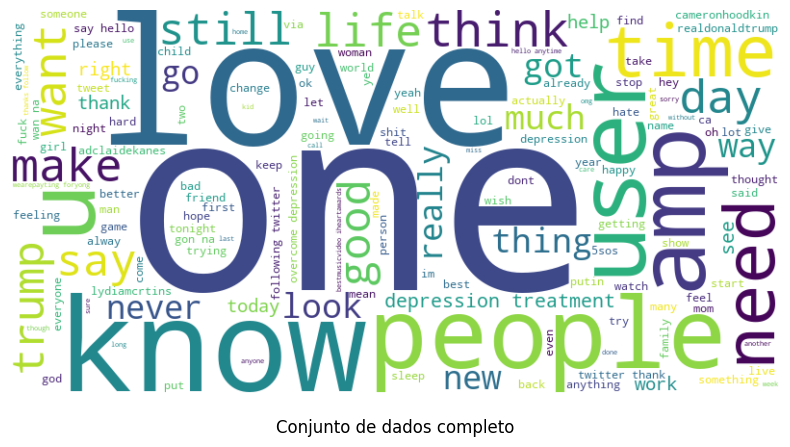

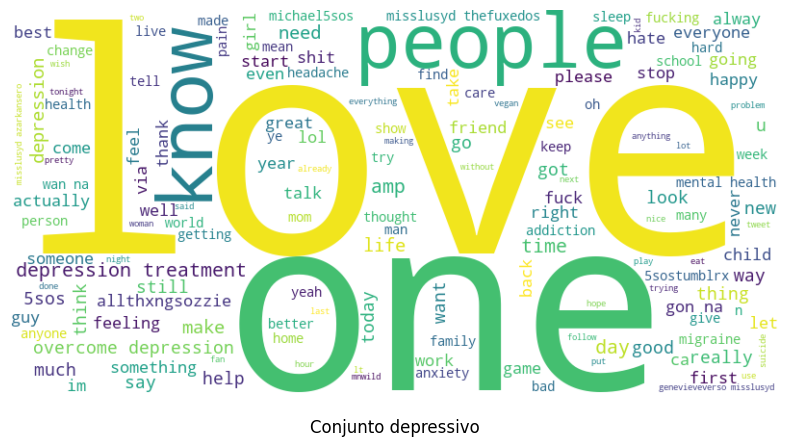

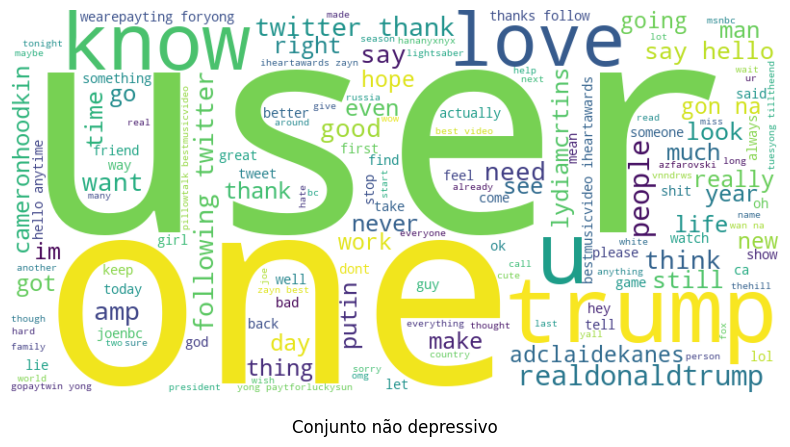

In [9]:
# Criando nuvem de palavras
wordcloud = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(' '.join(df['text_lemmatized']))
wordcloud_depress = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(' '.join(df_depress['text_lemmatized']))
wordcloud_non_depress = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(' '.join(df_non_depress['text_lemmatized']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.text(0.5, -0.1, "Conjunto de dados completo", size=12, ha="center", transform=plt.gca().transAxes)
plt.show()


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_depress, interpolation='bilinear')
plt.axis('off')
plt.text(0.5, -0.1, "Conjunto depressivo", size=12, ha="center", transform=plt.gca().transAxes)
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_non_depress, interpolation='bilinear')
plt.axis('off')
plt.text(0.5, -0.1, "Conjunto não depressivo", size=12, ha="center", transform=plt.gca().transAxes)
plt.show()